<font color='maroon' size=5A face="black body"> Read Data And Perform cleaning </font>

<div class="alert alert-block alert-info">
Read file function
</div>

In [1]:
import os
import sys
from IPython.display import Markdown, display, Image
import numpy as np
import pandas as pd
import random
import math
import dvc.api
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from helper import Helper
from app_logger import App_Logger
import plots

ImportError: cannot import name 'Helper' from 'helper' (C:\Users\Betelhem\Desktop\10Acadamy\week-3_Pharmaceutical\main project\scripts\helper.py)

In [16]:
filepath = '../data/train.csv'
db =readFile(filepath)
db.head()

C:\Users\Betelhem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


<font color='maroon' size=5 face="black body"> Handling missing values </font>

<div class="alert alert-block alert-info">
Total missing values from the whole dataset
</div>

In [17]:
def percent_missing(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("The telecome dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The telecome dataset contains 0.0 % missing values.


In [18]:
db.shape

(1017209, 9)

In [19]:
db.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [20]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [21]:
db.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


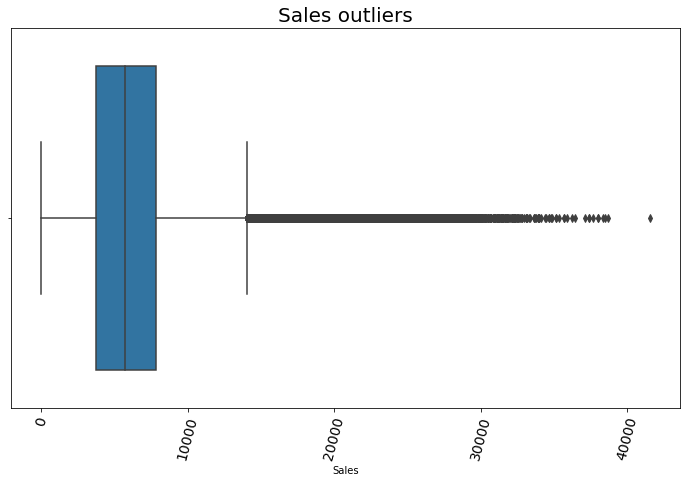

<Figure size 648x504 with 0 Axes>

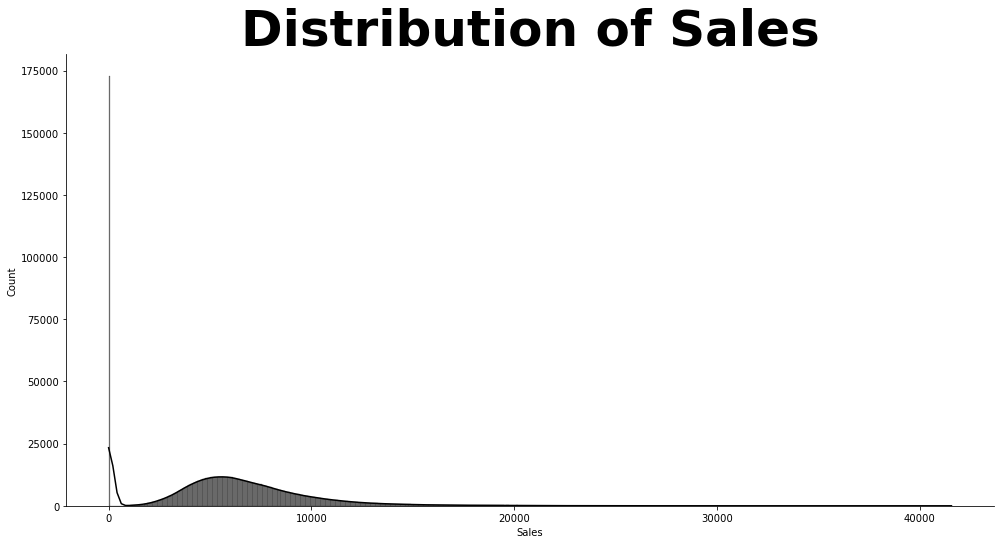

In [26]:
plots.plot_box(db, "Sales","Sales outliers")
plots.plot_hist(db,'Sales','black')


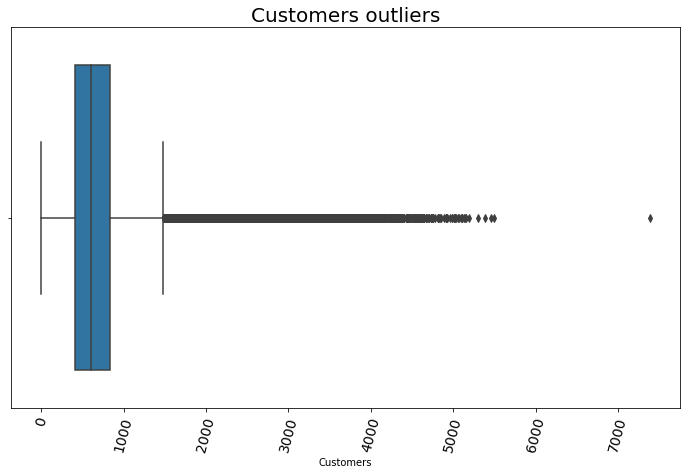

<Figure size 648x504 with 0 Axes>

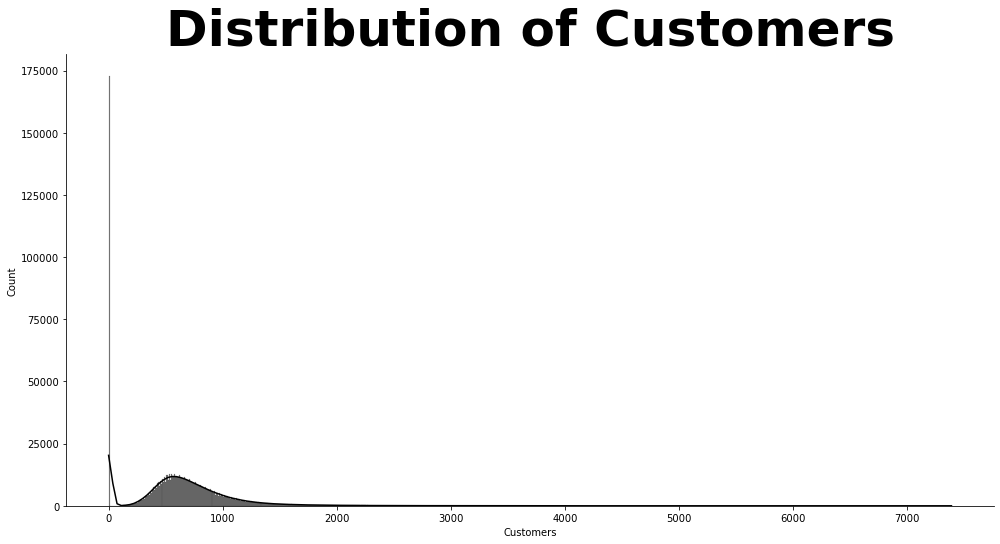

In [30]:
plots.plot_box(db, "Customers","Customers outliers")
plots.plot_hist(db,'Customers','black')


In [47]:
experiment_metrics = db.groupby('Store').agg({'Open': 'count'}).head(30)
experiment_metrics.sort_values(by=['Ope'], ascending=True)

<AxesSubplot:xlabel='Store'>

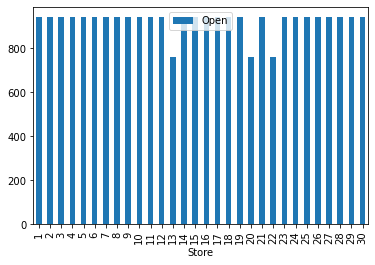

In [48]:
experiment_metrics.plot.bar()